In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
%matplotlib inline
warnings.filterwarnings(action='ignore')

In [6]:
import matplotlib.font_manager as fm  # 폰트확인 
font_list = [font.name for font in fm.fontManager.ttflist] # 설치된 폰트 확인 
font_list
plt.rcParams['font.family'] = 'AppleGothic' #폰트 변경 

In [7]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()
titanic.describe()   # 널 값이 있는 시리즈는 통계 연산 불가! 

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic.isnull().sum()   # 데이터 프레임의 널 값의 sum 확인

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
#2.결측데이터 확인
def  결측_table(df): 
        null_val = df.isnull().sum()
        percent = 100 * df.isnull().sum()/len(df)
        res= pd.concat([null_val, percent], axis=1)   # 두 개의 시리즈를 row 단위로 병합
        res_table_ren_columns = res.rename(
        columns = {0 : '결측값', 1 : '%'})
        return res_table_ren_columns
결측_table(titanic)    

,결측값,%
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
age,177,19.865320
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000
embarked,2,0.224467
class,0,0.000000
who,0,0.000000


ValueError: Cannot use `hue` without `x` and `y`

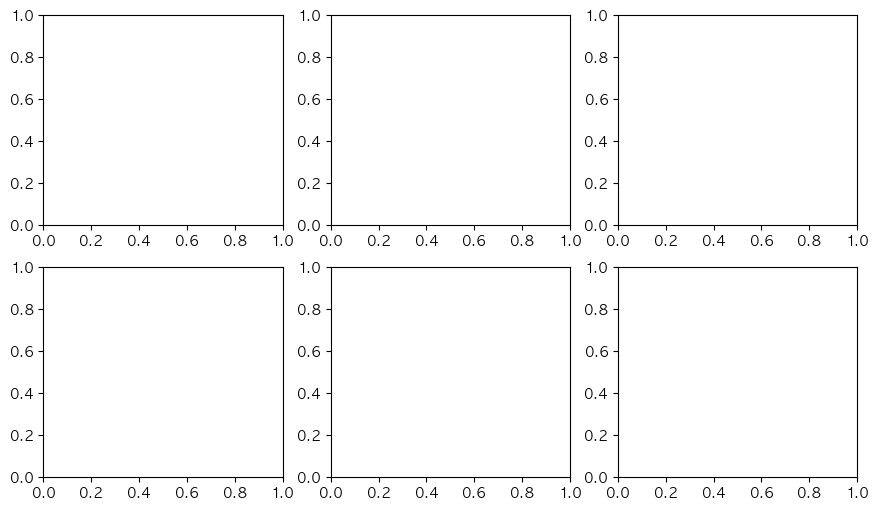

In [36]:
#3 Seaborn 카운트플롯 sns.countplot: 카테고리 데이터 정보 확인
cols = ['survived', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']
nr_rows = 2
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.countplot(titanic[cols[i]], hue='survived', ax=ax)
        ax.set_title(cols[i], fontsize=14, fontweight='bold')
        ax.legend(title='survived', loc='upper center') 

plt.tight_layout()   

In [37]:
#4 Seaborn Distplots 분산 정보 sns.distplot / 성별 , pclass, survived에 대한 age에 대한 분산 정보
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(titanic, row='sex', col='pclass', hue=titanic['survived'], margin_titles=True, size=3, aspect=1.1)
g.map(sns.distplot, 'age', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()  

TypeError: __init__() got an unexpected keyword argument 'size'

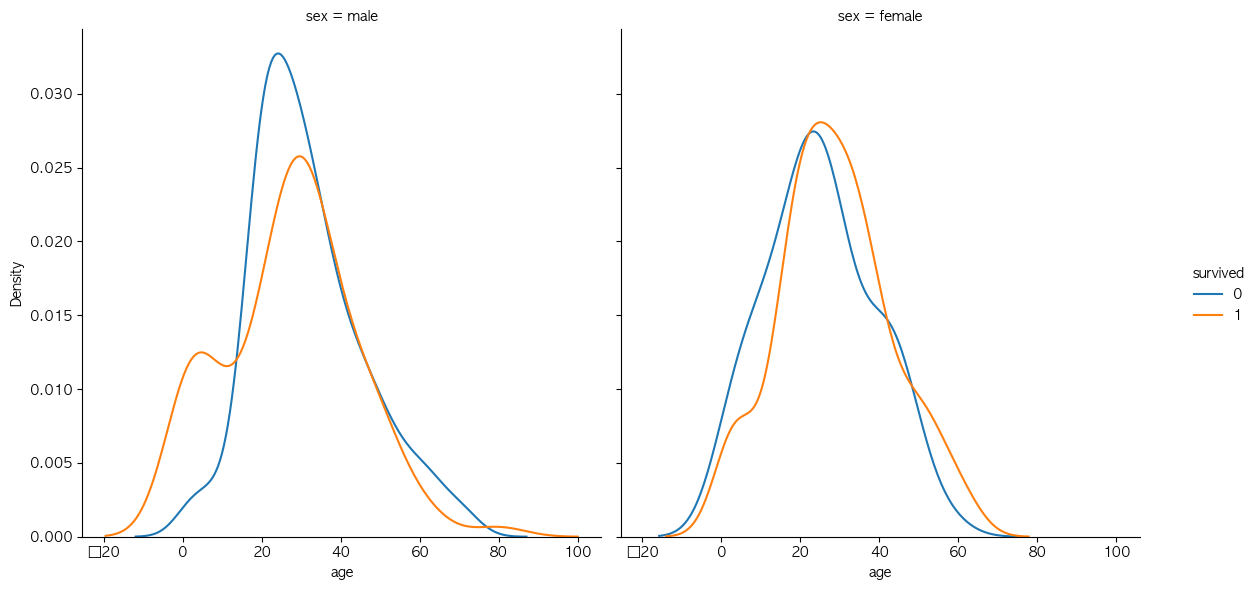

In [38]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(titanic, col='sex', hue='survived', margin_titles=True, height=6, aspect=1.0)
g.map(sns.distplot, 'age', kde=True, bins=bins, hist=False)
g.add_legend()  
plt.show()  

In [39]:
titanic['fare'].max()

512.3292

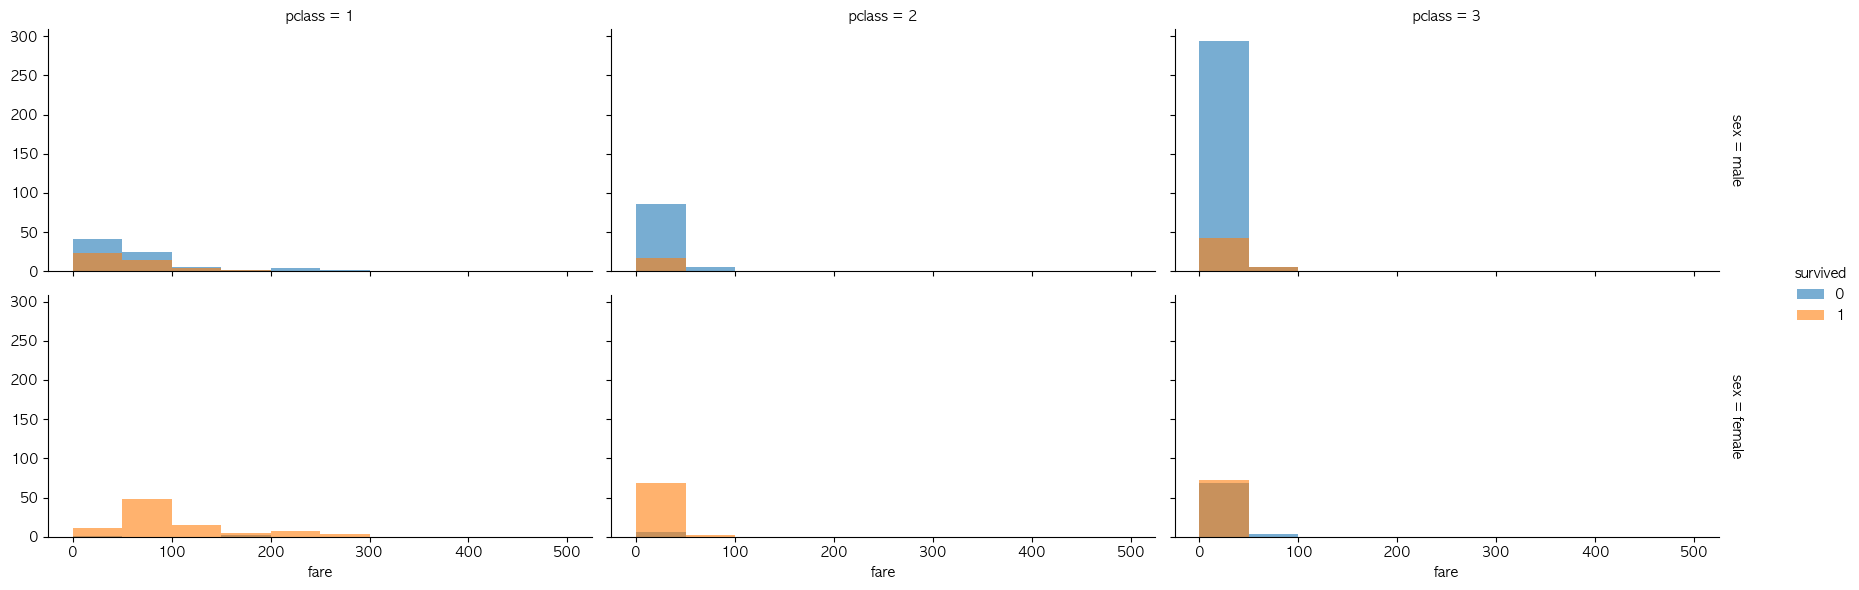

In [14]:
# 배 운임의 분산을 확인하자.
titanic['fare'].max()
#output: 512.3292
bins = np.arange(0, 550, 50)
g = sns.FacetGrid(titanic, row='sex', col='pclass', hue='survived', margin_titles=True, height=3, aspect=2.0)
g.map(sns.distplot, 'fare', kde=False, bins=bins,hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()  

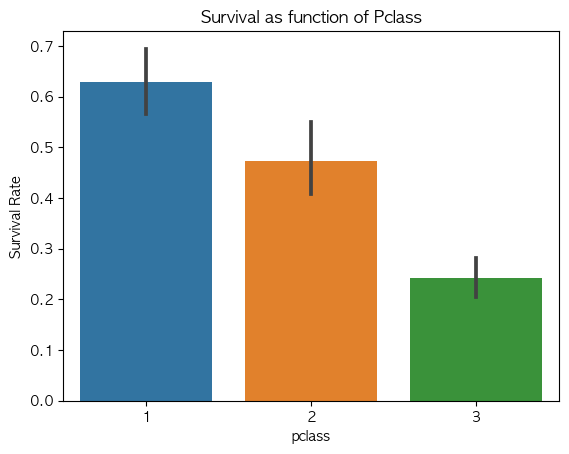

In [15]:
#5. 막대그래프 : 카테고리별 평균값, 신뢰구간 플로팅    -> pclass가 높을 수록 생존률이 높다.
sns.barplot(x='pclass', y='survived', data=titanic);
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass")
plt.show()

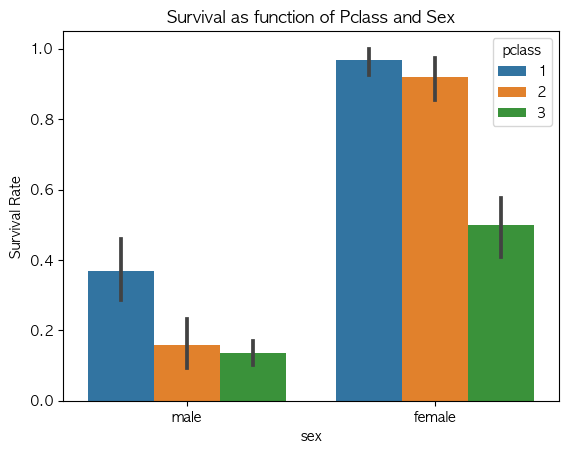

In [16]:
# 남여 별로 분석해 보자.   # p1 클래스 여성으로 0.90~ 확률로 살아남는다. / p3 클래스의 남성은 생존률이 낮다.  
sns.barplot(x='sex', y='survived', hue='pclass', data=titanic)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Sex")
plt.show()

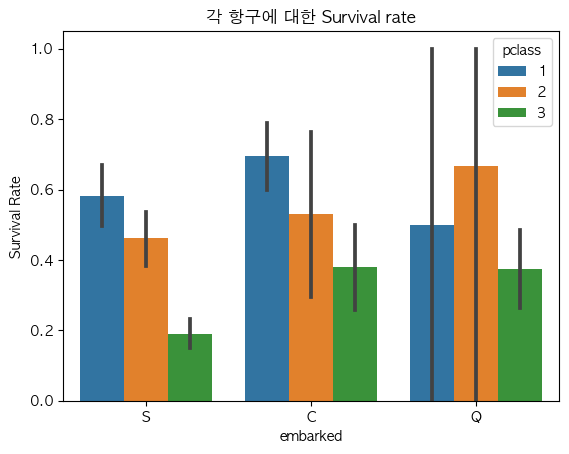

In [17]:
# 각 항구에 대한 생존률
sns.barplot(x='embarked', y='survived', hue='pclass', data=titanic)
plt.ylabel("Survival Rate")
plt.title("각 항구에 대한 Survival rate")
plt.show()

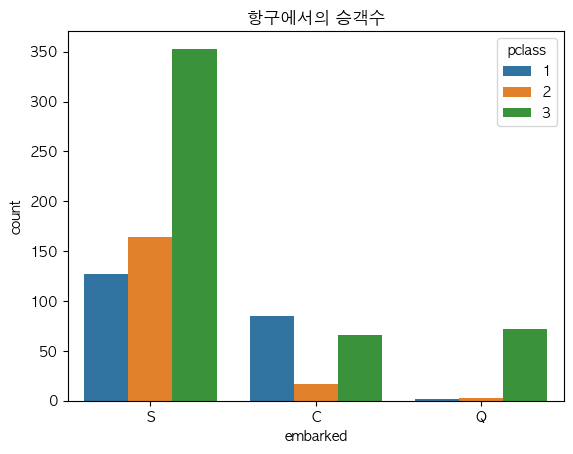

In [18]:
sns.countplot(x='embarked', hue='pclass', data=titanic)
plt.title("항구에서의 승객수")
plt.show()   # Q의 신뢰 구간이 모호하다 할 경우 각 항구에서 승객 수를 출력하자.
# S항에서 탑승한 승객이 p1 클래스의 비율보다 낮다.
# Q에 pclass3의 승객이 거의이다.

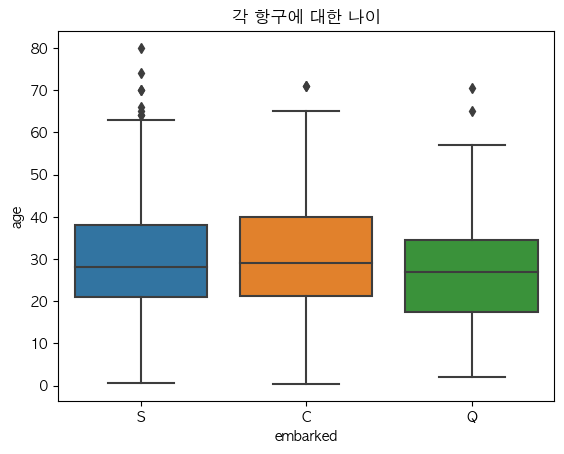

In [19]:
# 6. boxplot: 중앙값, 이상값, 분산 정보 등 시각화 (각 항구, 나이에 관한 값)

sns.boxplot(x='embarked', y='age', data=titanic)
plt.title("각 항구에 대한 나이")
plt.show()

In [20]:
titanic['age'].quantile([.0, .2, .4, .6, .8, 1.0 ])   #데이터의 백분위수, 시리즈메소드
# [0.42  19.00]  < [19.0  25.0]  < [25.0  31.80] < [31.80 < 41.00] [41.0, 80]...] ... 라벨링 분할 
# 'child'           'young'          'middle'        'old'           'very old

0.0     0.42
0.2    19.00
0.4    25.00
0.6    31.80
0.8    41.00
1.0    80.00
Name: age, dtype: float64

<AxesSubplot: >

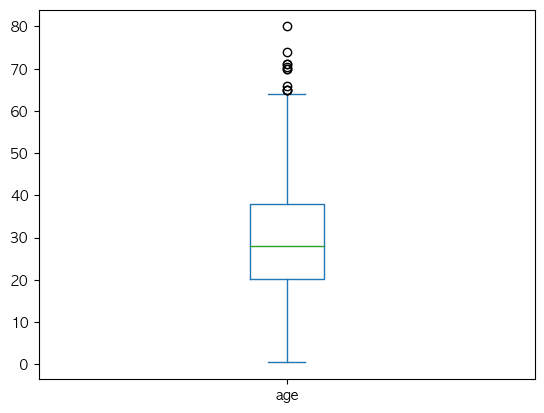

In [21]:
titanic['age'].plot.box()

In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [23]:
# 1-1'age'로 등급별 생존율 구하기 / 피벗과 통계 함수를 확인 
titanic.pivot_table('survived', 'age', aggfunc = 'mean')
titanic['age'].min()   # 0.42
titanic['age'].max()   # 80.0
titanic['age'].mean()  # 29.69

,survived
age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


0.42

80.0

29.69911764705882

In [24]:
# 1-2 레벨링 등급 나누기
titanic['age_class'] = pd.qcut(titanic.age, 5, 
        labels = ['child', 'young', 'middle', 'old', 'very old'])
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_class
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,old
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,middle
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,old
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,middle
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,middle


In [25]:
# 1-3'age_class', 5단계 연령 등급별 생존율 
titanic.pivot_table('survived', 'age_class', aggfunc = 'mean')

,survived
age_class,
child,0.481707
young,0.328467
middle,0.393701
old,0.437500
very old,0.373239


In [26]:
# 1-4 'sex', 'age_class' 를 MultiIndex로 한 평균 생존율
titanic.pivot_table('survived', index = ['sex', 'age_class'], aggfunc = 'mean')

survived
sex    age_class          
female child      0.706667
       young      0.723404
       middle     0.727273
       old        0.843137
       very old   0.795455
male   child      0.292135
       young      0.122222
       middle     0.216867
       old        0.215054
       very old   0.183673

In [27]:
# 1-5 분포의 갯수
titanic['age_class'].value_counts()

child       164
old         144
very old    142
young       137
middle      127
Name: age_class, dtype: int64

In [28]:
# 1-6 생존율의 분포 
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [29]:
# Series 객체의 quantile()함수: 데이터의 백분위수
titanic['age'].quantile([.0, .2, .4, .6, .8, 1.0])

0.0     0.42
0.2    19.00
0.4    25.00
0.6    31.80
0.8    41.00
1.0    80.00
Name: age, dtype: float64

AttributeError: PathCollection.set() got an unexpected keyword argument 'split'

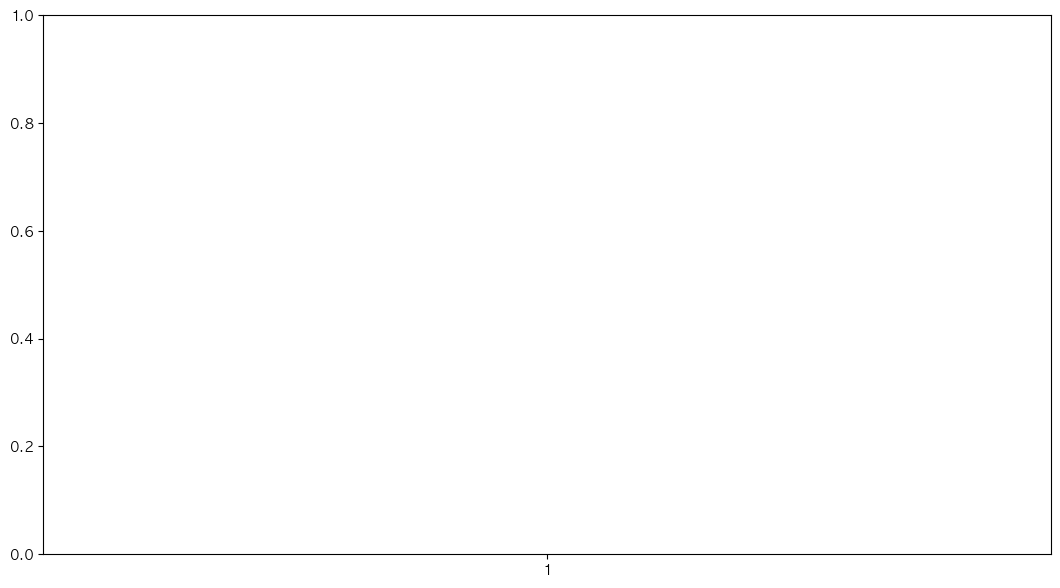

In [30]:
# choose color
cm_surv = ["darkgrey", "lightgreen"]

# plot swarm
fig, ax = plt.subplots(figsize = (13,7))
sns.swarmplot(x='pclass', y='age', hue = 'survived', split = True, data = titanic, palette = cm_surv, size = 7, ax = ax)
plt.title('Survivals for Age and Pclass')

# plot violin
fig, ax = plt.subplots(figsize = (13,7))
sns.violinplot(x="pclass", y = "age", hue = 'survived', data = titanic, split = True, bw = 0.05, palette = cm_surv, ax = ax)
plt.title('Survivavls for Age and Pclass')
plt.show()